
TFG

Este es el codigo del tfg de Borja Jimeno

In [9]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy import special
from scipy.stats import norm




plt.rcParams['font.size'] = 18

In [10]:
import uproot
file = uproot.open("results.root")
file.keys()

['gA112_6y_90_1.000000_6.000000_QFtamara_SI;1',
 'gA112_6y_90_1.000000_6.000000_QFtamara_SDproton;1',
 'gA112_6y_90_1.000000_6.000000_QFtamara_SDneutron;1',
 'gA112_6y_90_2.000000_6.000000_QFtamara_SDneutron;1',
 'gA112_6y_90_2.000000_6.000000_QFtamara_SDproton;1',
 'gA112_6y_90_2.000000_6.000000_QFtamara_SI;1',
 'gA112_6y_90_1.000000_2.000000_QFtamara_SI;1',
 'gA112_6y_90_1.000000_2.000000_QFtamara_SDproton;1',
 'gA112_6y_90_1.000000_2.000000_QFtamara_SDneutron;1',
 'gA112_6y_90_1.000000_3.000000_QFtamara_SDneutron;1',
 'gA112_6y_90_1.000000_3.000000_QFtamara_SDproton;1',
 'gA112_6y_90_1.000000_3.000000_QFtamara_SI;1']

In [11]:
file["gA112_6y_90_1.000000_3.000000_QFtamara_SI;1"].all_members

{'@fUniqueID': 0,
 '@fBits': 50332672,
 'fName': 'Graph',
 'fTitle': 'Graph',
 'fLineColor': 1,
 'fLineStyle': 1,
 'fLineWidth': 1,
 'fFillColor': 0,
 'fFillStyle': 1000,
 'fMarkerColor': 1,
 'fMarkerStyle': 1,
 'fMarkerSize': 1.0,
 'fNpoints': 144,
 'fX': array([3.000e+00, 3.750e+00, 4.500e+00, 5.250e+00, 4.000e+00, 5.000e+00,
        6.000e+00, 7.000e+00, 5.000e+00, 6.250e+00, 7.500e+00, 8.750e+00,
        6.000e+00, 7.500e+00, 9.000e+00, 1.050e+01, 7.000e+00, 8.750e+00,
        1.050e+01, 1.225e+01, 8.000e+00, 1.000e+01, 1.200e+01, 1.400e+01,
        9.000e+00, 1.125e+01, 1.350e+01, 1.575e+01, 1.000e+01, 1.250e+01,
        1.500e+01, 1.750e+01, 2.000e+01, 2.500e+01, 3.000e+01, 3.500e+01,
        3.000e+01, 3.750e+01, 4.500e+01, 5.250e+01, 4.000e+01, 5.000e+01,
        6.000e+01, 7.000e+01, 5.000e+01, 6.250e+01, 7.500e+01, 8.750e+01,
        6.000e+01, 7.500e+01, 9.000e+01, 1.050e+02, 7.000e+01, 8.750e+01,
        1.050e+02, 1.225e+02, 8.000e+01, 1.000e+02, 1.200e+02, 1.400e+02,
    

In [12]:
import numpy as np


def carga_datos_hist(titulo):
    file = uproot.open("results.root")
    file.keys()
    longitud=36*4
    datos=np.zeros((6,longitud))
    i=0
    for a in ("SI","SDproton","SDneutron"):
        graph = file[titulo+a]
        datos[2*i]=graph.member("fX")
        datos[2*i+1]=graph.member("fY")
        i=i+1
    return datos
    #np.savetxt("Exposicion_exp.csv",datos)   

Datos16=carga_datos_hist("gA112_6y_90_1.000000_6.000000_QFtamara_")
Datos26=carga_datos_hist("gA112_6y_90_2.000000_6.000000_QFtamara_")
Datos12=carga_datos_hist("gA112_6y_90_1.000000_2.000000_QFtamara_")
Datos13=carga_datos_hist("gA112_6y_90_1.000000_3.000000_QFtamara_")




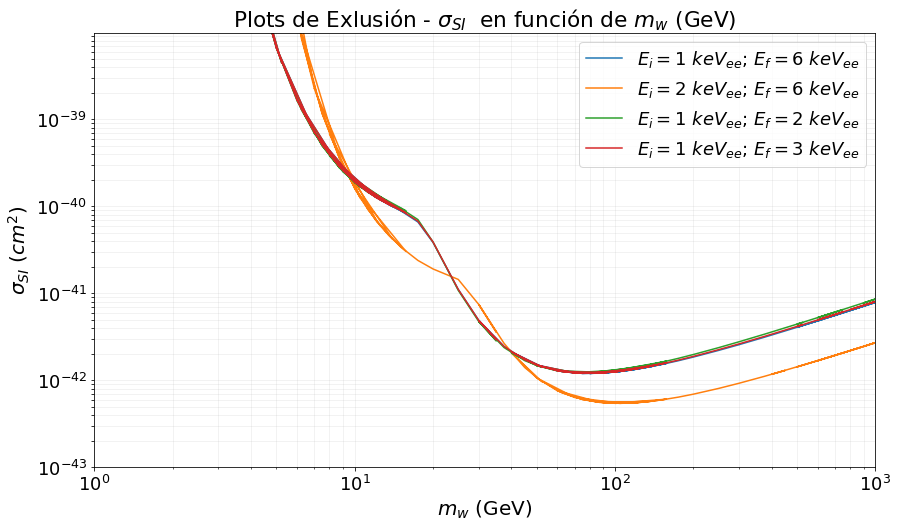

In [13]:

plt.figure(figsize=(14, 8))
ax = plt.subplot()

ax.plot(Datos16[0],Datos16[1],label="$E_i=$"+f"{1}"+" $keV_{ee}$; $E_f=$"+f"{6}"+" $keV_{ee}$")
ax.plot(Datos26[0],Datos26[1],label="$E_i=$"+f"{2}"+" $keV_{ee}$; $E_f=$"+f"{6}"+" $keV_{ee}$")
ax.plot(Datos12[0],Datos12[1],label="$E_i=$"+f"{1}"+" $keV_{ee}$; $E_f=$"+f"{2}"+" $keV_{ee}$")
ax.plot(Datos13[0],Datos13[1],label="$E_i=$"+f"{1}"+" $keV_{ee}$; $E_f=$"+f"{3}"+" $keV_{ee}$")

ax.legend()
ax.set_title(r'Plots de Exlusión - $\sigma_{SI}$  en función de $m_w$ (GeV)')
ax.set_ylabel(r'$\sigma_{SI}$ $(cm^2)$',fontsize=20)
ax.set_xlabel(r'$m_w$ (GeV)',fontsize=20)

ax.set_yscale("log")
ax.set_xscale("log")

y_sup=1e-38
y_inf=1e-43

ax.set_ylim(y_inf,y_sup)
ax.set_xlim(1,1000)

exp_min = int(np.floor(np.log10(y_inf)))   
exp_max = int(np.ceil(np.log10(y_sup)))    
exps = np.arange(exp_min, exp_max)     


all_ticks = []
for e in exps:
    decade = (np.arange(1, 10) * (10.0**e)).tolist()
    all_ticks.extend(decade)
all_ticks = np.array(all_ticks)

ax.set_yticks(all_ticks)                    

ax.grid(which='both', linestyle='-', alpha=0.2)

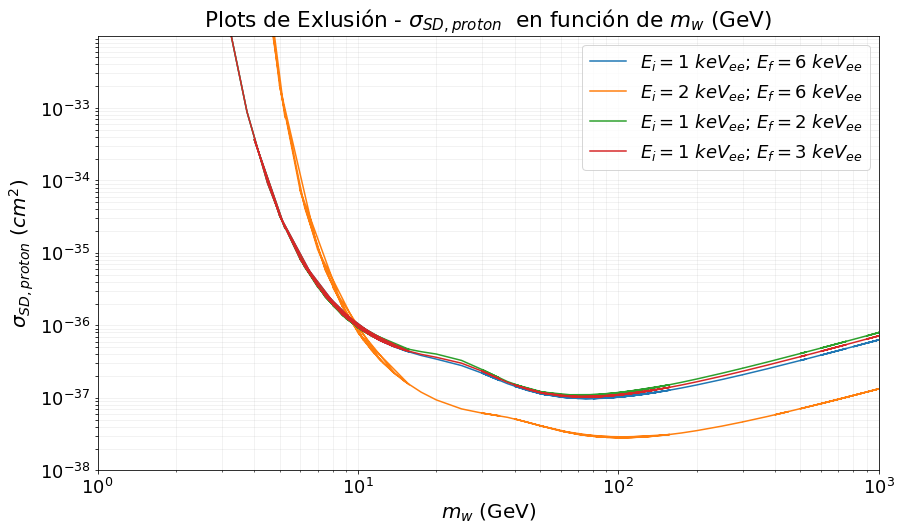

In [14]:

plt.figure(figsize=(14, 8))
ax = plt.subplot()

ax.plot(Datos16[2],Datos16[3],label="$E_i=$"+f"{1}"+" $keV_{ee}$; $E_f=$"+f"{6}"+" $keV_{ee}$")
ax.plot(Datos26[2],Datos26[3],label="$E_i=$"+f"{2}"+" $keV_{ee}$; $E_f=$"+f"{6}"+" $keV_{ee}$")
ax.plot(Datos12[2],Datos12[3],label="$E_i=$"+f"{1}"+" $keV_{ee}$; $E_f=$"+f"{2}"+" $keV_{ee}$")
ax.plot(Datos13[2],Datos13[3],label="$E_i=$"+f"{1}"+" $keV_{ee}$; $E_f=$"+f"{3}"+" $keV_{ee}$")

ax.legend()
ax.set_title(r'Plots de Exlusión - $\sigma_{SD,proton}$  en función de $m_w$ (GeV)')
ax.set_ylabel(r'$\sigma_{SD,proton}$ $(cm^2)$',fontsize=20)
ax.set_xlabel(r'$m_w$ (GeV)',fontsize=20)

ax.set_yscale("log")
ax.set_xscale("log")

y_sup=1e-32
y_inf=1e-38

ax.set_ylim(y_inf,y_sup)
ax.set_xlim(1,1000)

exp_min = int(np.floor(np.log10(y_inf)))   
exp_max = int(np.ceil(np.log10(y_sup)))    
exps = np.arange(exp_min, exp_max)     


all_ticks = []
for e in exps:
    decade = (np.arange(1, 10) * (10.0**e)).tolist()
    all_ticks.extend(decade)
all_ticks = np.array(all_ticks)

ax.set_yticks(all_ticks)                    

ax.grid(which='both', linestyle='-', alpha=0.2)

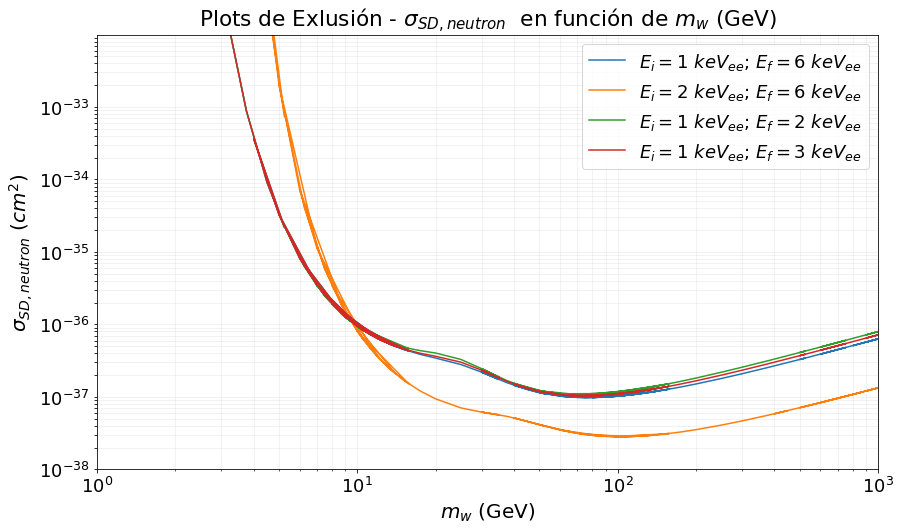

In [15]:

plt.figure(figsize=(14, 8))
ax = plt.subplot()

ax.plot(Datos16[4],Datos16[5],label="$E_i=$"+f"{1}"+" $keV_{ee}$; $E_f=$"+f"{6}"+" $keV_{ee}$")
ax.plot(Datos26[4],Datos26[5],label="$E_i=$"+f"{2}"+" $keV_{ee}$; $E_f=$"+f"{6}"+" $keV_{ee}$")
ax.plot(Datos12[4],Datos12[5],label="$E_i=$"+f"{1}"+" $keV_{ee}$; $E_f=$"+f"{2}"+" $keV_{ee}$")
ax.plot(Datos13[4],Datos13[5],label="$E_i=$"+f"{1}"+" $keV_{ee}$; $E_f=$"+f"{3}"+" $keV_{ee}$")

ax.legend()
ax.set_title(r'Plots de Exlusión - $\sigma_{SD,neutron}$  en función de $m_w$ (GeV)')
ax.set_ylabel(r'$\sigma_{SD,neutron}$ $(cm^2)$',fontsize=20)
ax.set_xlabel(r'$m_w$ (GeV)',fontsize=20)

ax.set_yscale("log")
ax.set_xscale("log")

y_sup=1e-32
y_inf=1e-38

ax.set_ylim(y_inf,y_sup)
ax.set_xlim(1,1000)

exp_min = int(np.floor(np.log10(y_inf)))   
exp_max = int(np.ceil(np.log10(y_sup)))    
exps = np.arange(exp_min, exp_max)     


all_ticks = []
for e in exps:
    decade = (np.arange(1, 10) * (10.0**e)).tolist()
    all_ticks.extend(decade)
all_ticks = np.array(all_ticks)

ax.set_yticks(all_ticks)                    

ax.grid(which='both', linestyle='-', alpha=0.2)

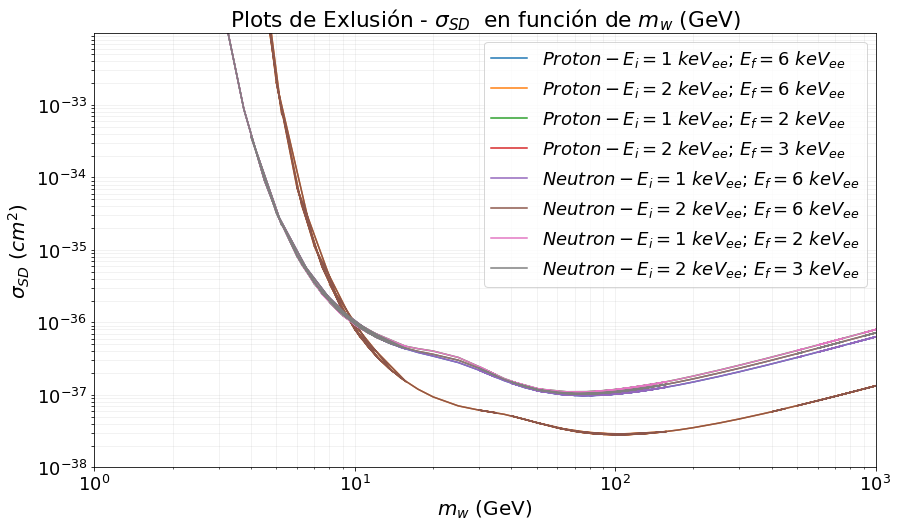

In [16]:

plt.figure(figsize=(14, 8))
ax = plt.subplot()

ax.plot(Datos16[2],Datos16[3],label="$Proton - E_i=$"+f"{1}"+" $keV_{ee}$; $E_f=$"+f"{6}"+" $keV_{ee}$")
ax.plot(Datos26[2],Datos26[3],label="$Proton - E_i=$"+f"{2}"+" $keV_{ee}$; $E_f=$"+f"{6}"+" $keV_{ee}$")
ax.plot(Datos12[2],Datos12[3],label="$Proton - E_i=$"+f"{1}"+" $keV_{ee}$; $E_f=$"+f"{2}"+" $keV_{ee}$")
ax.plot(Datos13[2],Datos13[3],label="$Proton - E_i=$"+f"{2}"+" $keV_{ee}$; $E_f=$"+f"{3}"+" $keV_{ee}$")

ax.plot(Datos16[4],Datos16[5],label="$Neutron - E_i=$"+f"{1}"+" $keV_{ee}$; $E_f=$"+f"{6}"+" $keV_{ee}$")
ax.plot(Datos26[4],Datos26[5],label="$Neutron - E_i=$"+f"{2}"+" $keV_{ee}$; $E_f=$"+f"{6}"+" $keV_{ee}$")
ax.plot(Datos12[4],Datos12[5],label="$Neutron - E_i=$"+f"{1}"+" $keV_{ee}$; $E_f=$"+f"{2}"+" $keV_{ee}$")
ax.plot(Datos13[4],Datos13[5],label="$Neutron - E_i=$"+f"{2}"+" $keV_{ee}$; $E_f=$"+f"{3}"+" $keV_{ee}$")

ax.legend()
ax.set_title(r'Plots de Exlusión - $\sigma_{SD}$  en función de $m_w$ (GeV)')
ax.set_ylabel(r'$\sigma_{SD}$ $(cm^2)$',fontsize=20)
ax.set_xlabel(r'$m_w$ (GeV)',fontsize=20)

ax.set_yscale("log")
ax.set_xscale("log")

y_sup=1e-32
y_inf=1e-38

ax.set_ylim(y_inf,y_sup)
ax.set_xlim(1,1000)

exp_min = int(np.floor(np.log10(y_inf)))   
exp_max = int(np.ceil(np.log10(y_sup)))    
exps = np.arange(exp_min, exp_max)     


all_ticks = []
for e in exps:
    decade = (np.arange(1, 10) * (10.0**e)).tolist()
    all_ticks.extend(decade)
all_ticks = np.array(all_ticks)

ax.set_yticks(all_ticks)                    

ax.grid(which='both', linestyle='-', alpha=0.2)